## Data Science and Business Analytics

## The Sparks Foundation

## Author : Navjot Kaur

#### Exploratory Data Analysis - ‘Global Terrorism’

#### Task - 4
In this project, we'll be performing some exploratory data analysis on the ‘Global Terrorism’.

In [1]:
# import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Import the data
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Cleaning of data
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                     'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded',
                     'summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
df = data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
df['casualities']=df['Killed']+df['Wounded']

In [12]:
data= df.copy()
data.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [13]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [14]:
print('Country with Highest Terrorist Attacks:', data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',data['Killed'].max(),'that took place in',data.loc[data['Killed'].idxmax()].Country)


Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


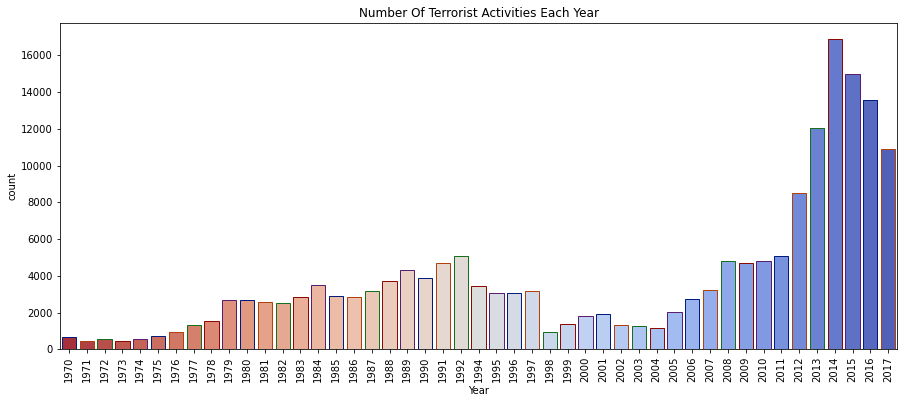

In [15]:
# Increase in the no. of terrorist activity/attack from 1970 -2017
plt.figure(figsize=(15,6))
sns.countplot('Year',data=data,palette='coolwarm_r',edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

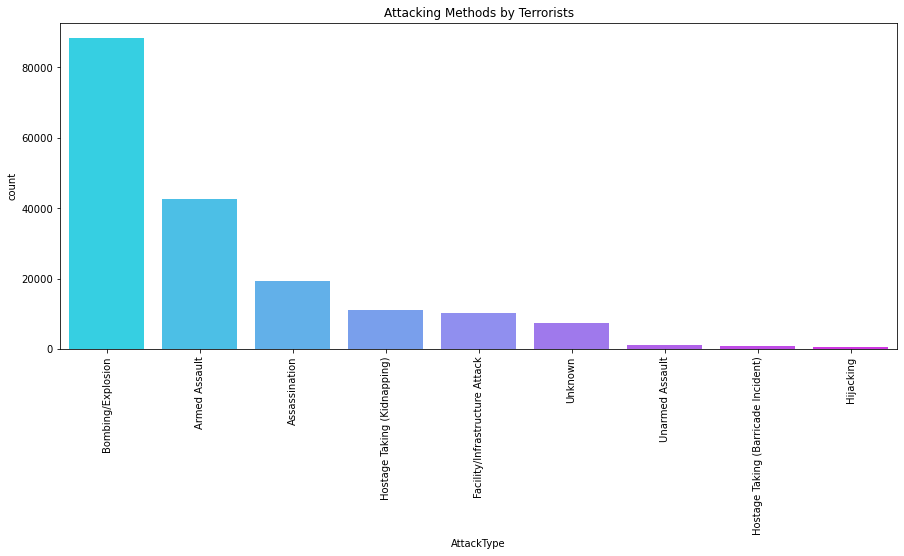

In [16]:
# Methods used by terrorist for terror attacks
plt.figure(figsize=(15,6))
sns.countplot('AttackType',data=data,palette='cool',order=data['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

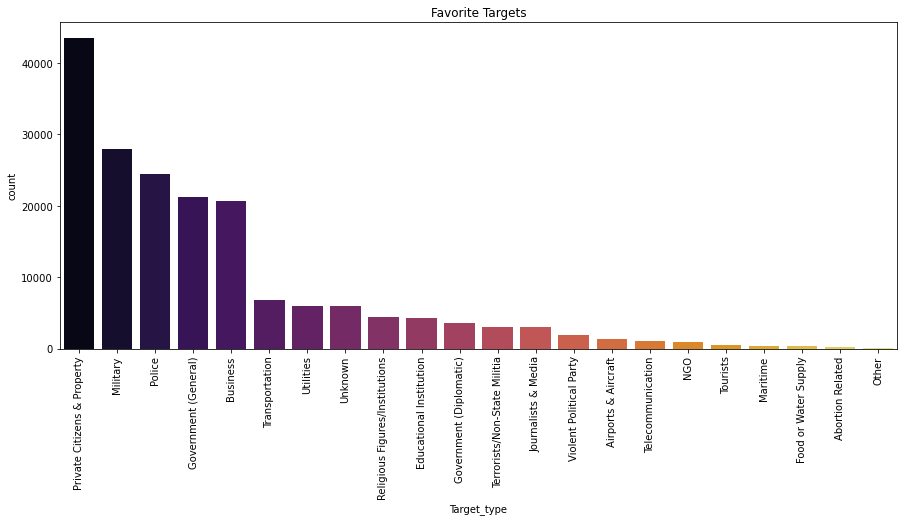

In [17]:
# their target areas
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=data,palette='inferno',order=data['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

# Terror by Region

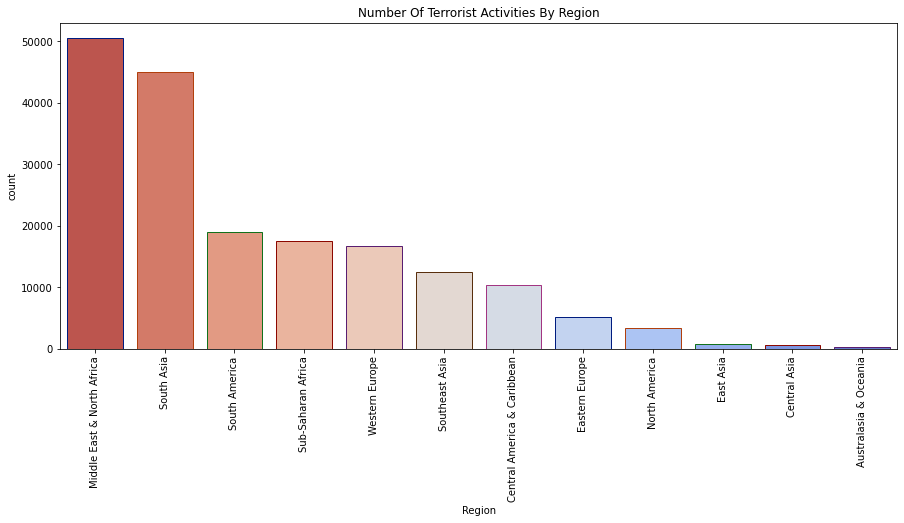

In [18]:
## Terror attacks frequent occurs Regions all over the world 
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=data,palette='coolwarm_r',
              edgecolor=sns.color_palette('dark',7),order=data['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

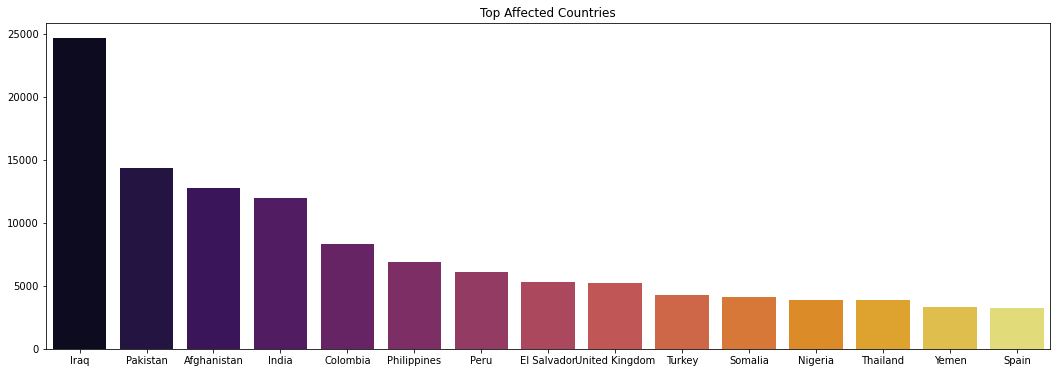

In [19]:
# countries which have more effect of terror activity 
plt.subplots(figsize=(18,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

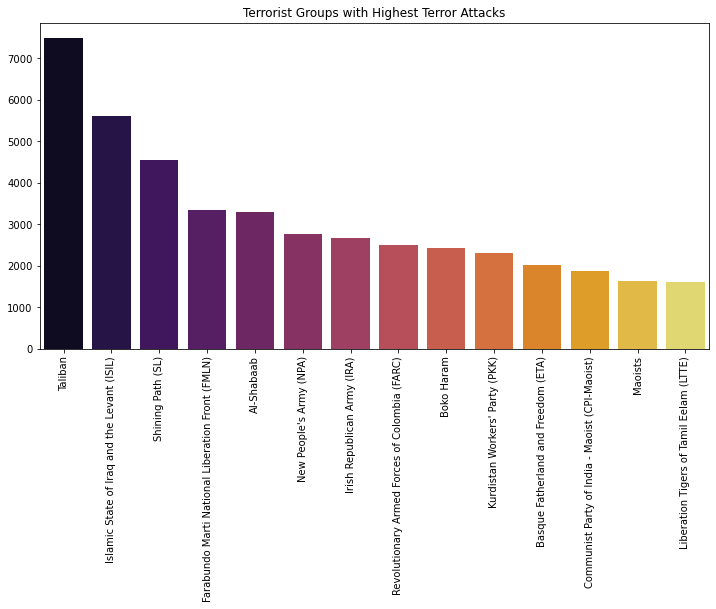

In [20]:
# Terrorist Group
plt.figure(figsize=(12,6))
sns.barplot(data['Group'].value_counts()[1:15].index,data['Group'].value_counts()[1:15].values,palette=('inferno'))
plt.xticks(rotation=90)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

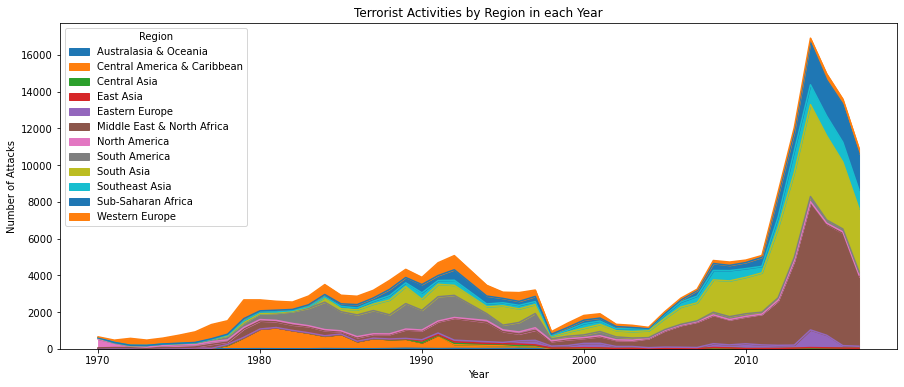

In [21]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

- here we can see the effect of terror region with the time period
- in earlier phase the terror attacks are more on western Europe , Central America and caribbean, South America
- on the fater phase after 2000 the terror attacks are more in Middle East and North America, South Asia, Sub- sahara Africa.
- The region of the terror attack changed after a century.

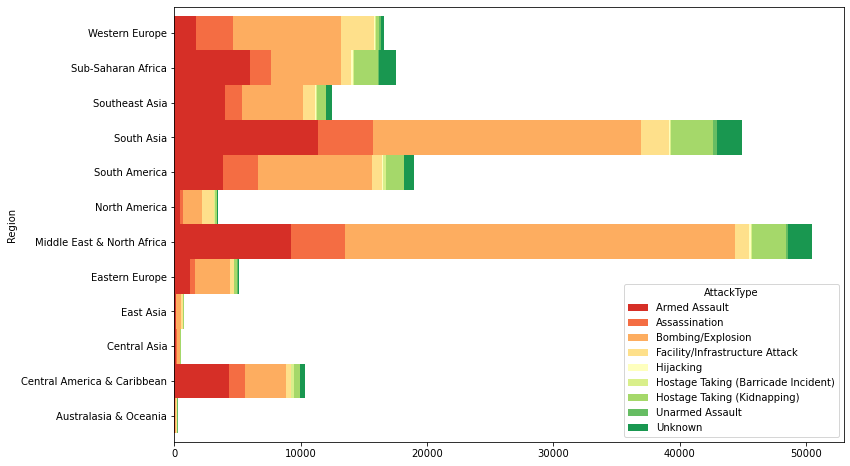

In [22]:
pd.crosstab(data.Region,data.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

- Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

In [23]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['casualities'] = data['Killed'] + data['Wounded']

terror1 = data.sort_values(by='casualities',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)



In [60]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
HP = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=HP, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

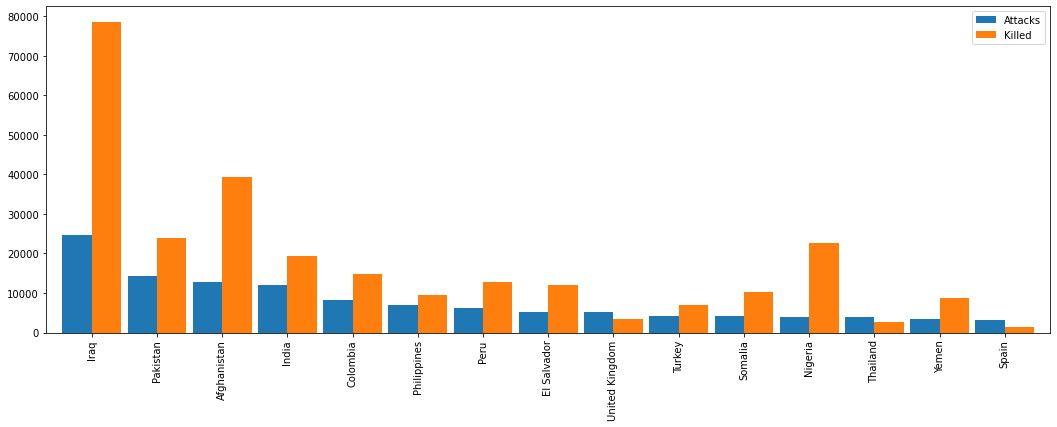

In [25]:
coun_terror = data['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill = data.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [32]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [33]:
# Let's look at what types of attacks these deaths were made of.
attackData = data.loc[:,'AttackType']
# attack Data
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [34]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


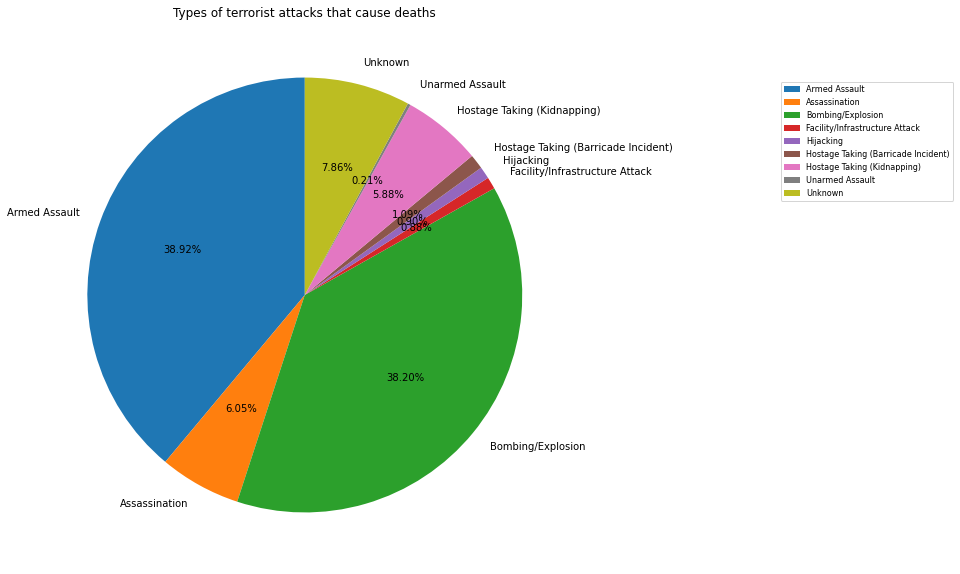

In [36]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%', labels = labels)
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(loc='upper right', bbox_to_anchor = (1.7, 0.9), fontsize=8) # location legend
plt.show()

In [37]:
#Number of Killed in Terrorist Attacks by Countries
countryData = data.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [38]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [41]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=15
plt.rcParams["figure.figsize"] = fig_size

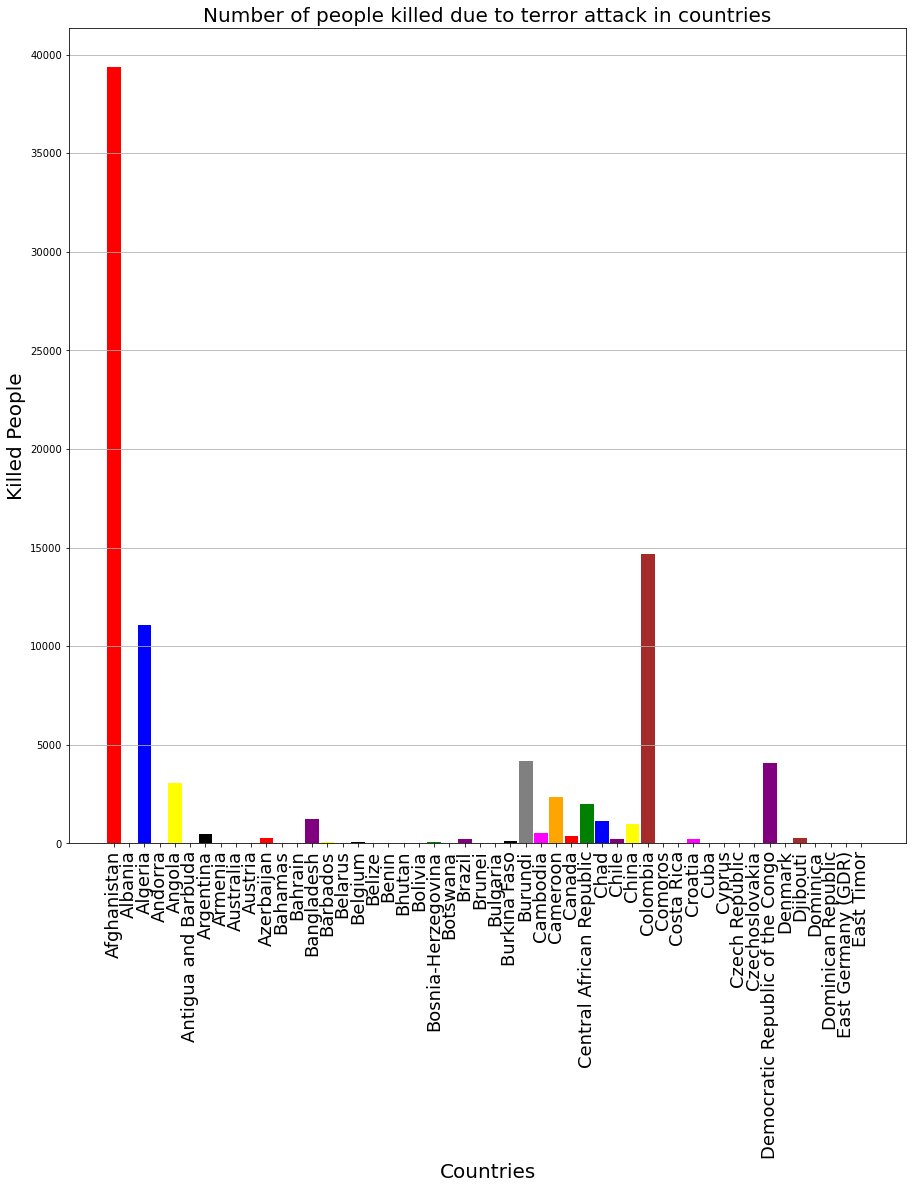

In [42]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 

fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=15
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed due to terror attack in countries', fontsize = 20)
# print(fig_size)
plt.show()

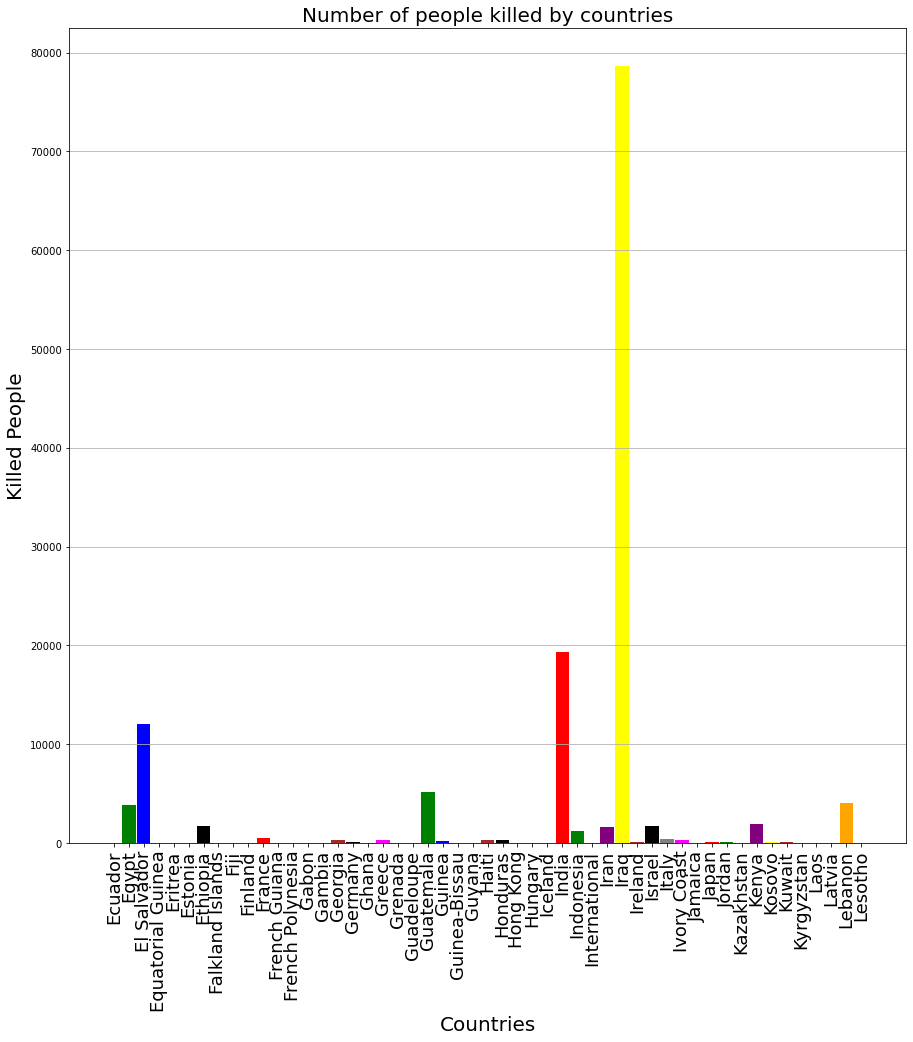

In [43]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

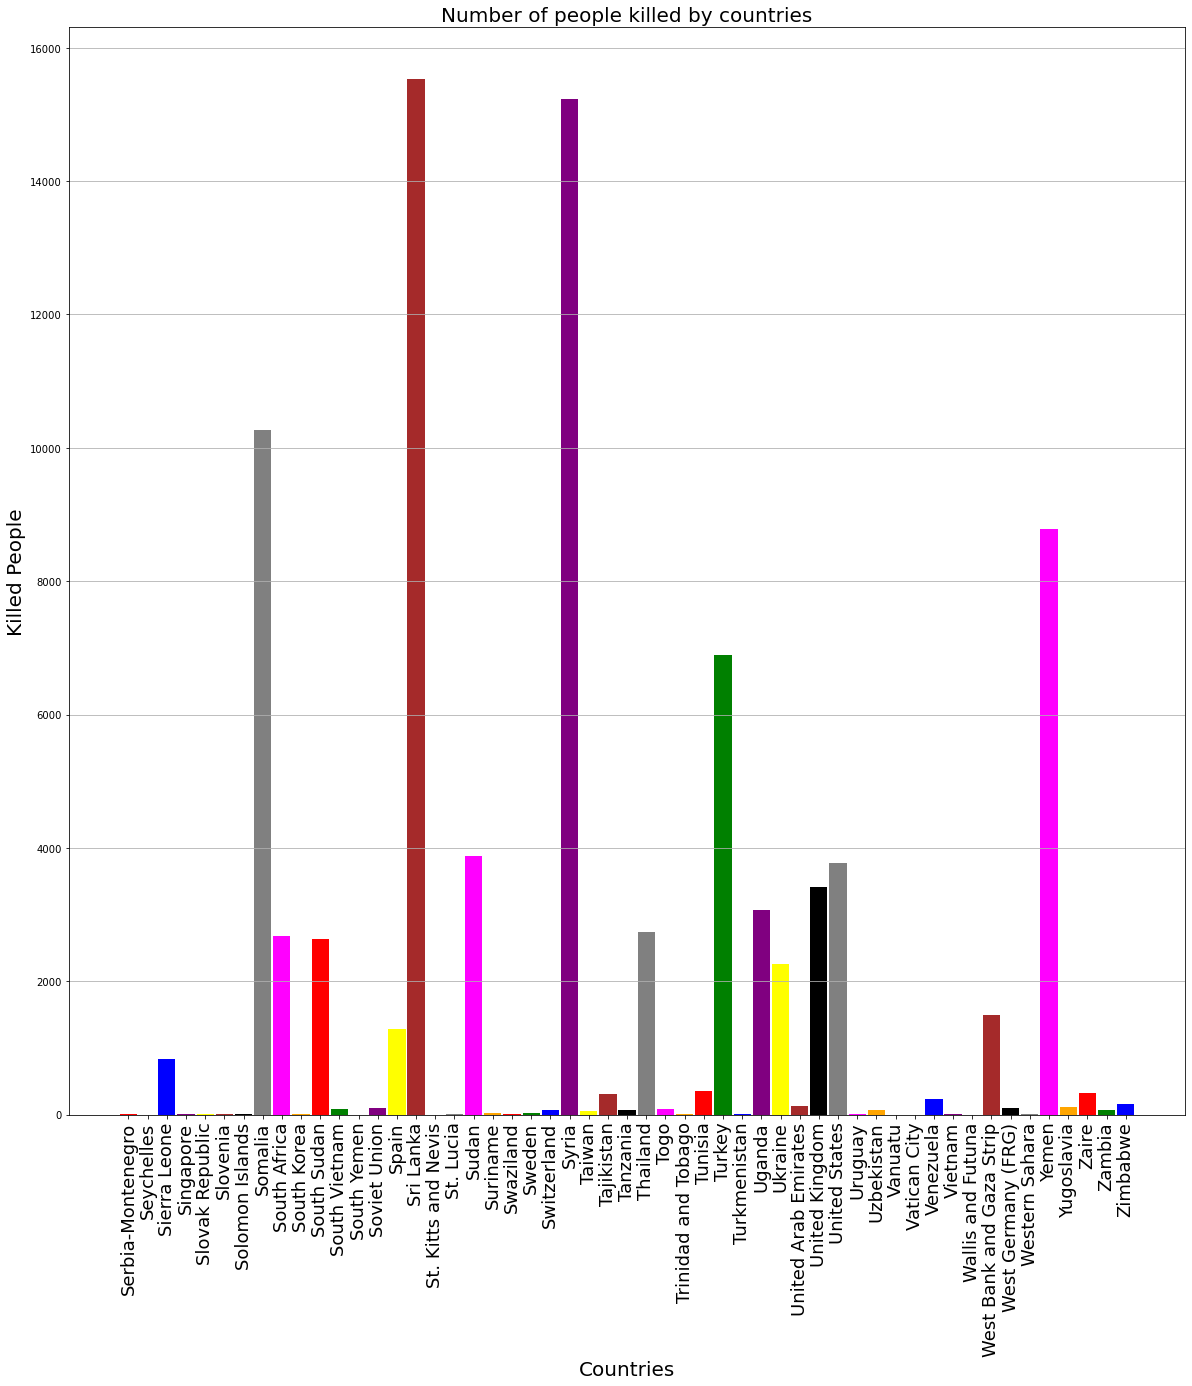

In [44]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

#### Most Notorious Groups in USA and Favorite Attack Type

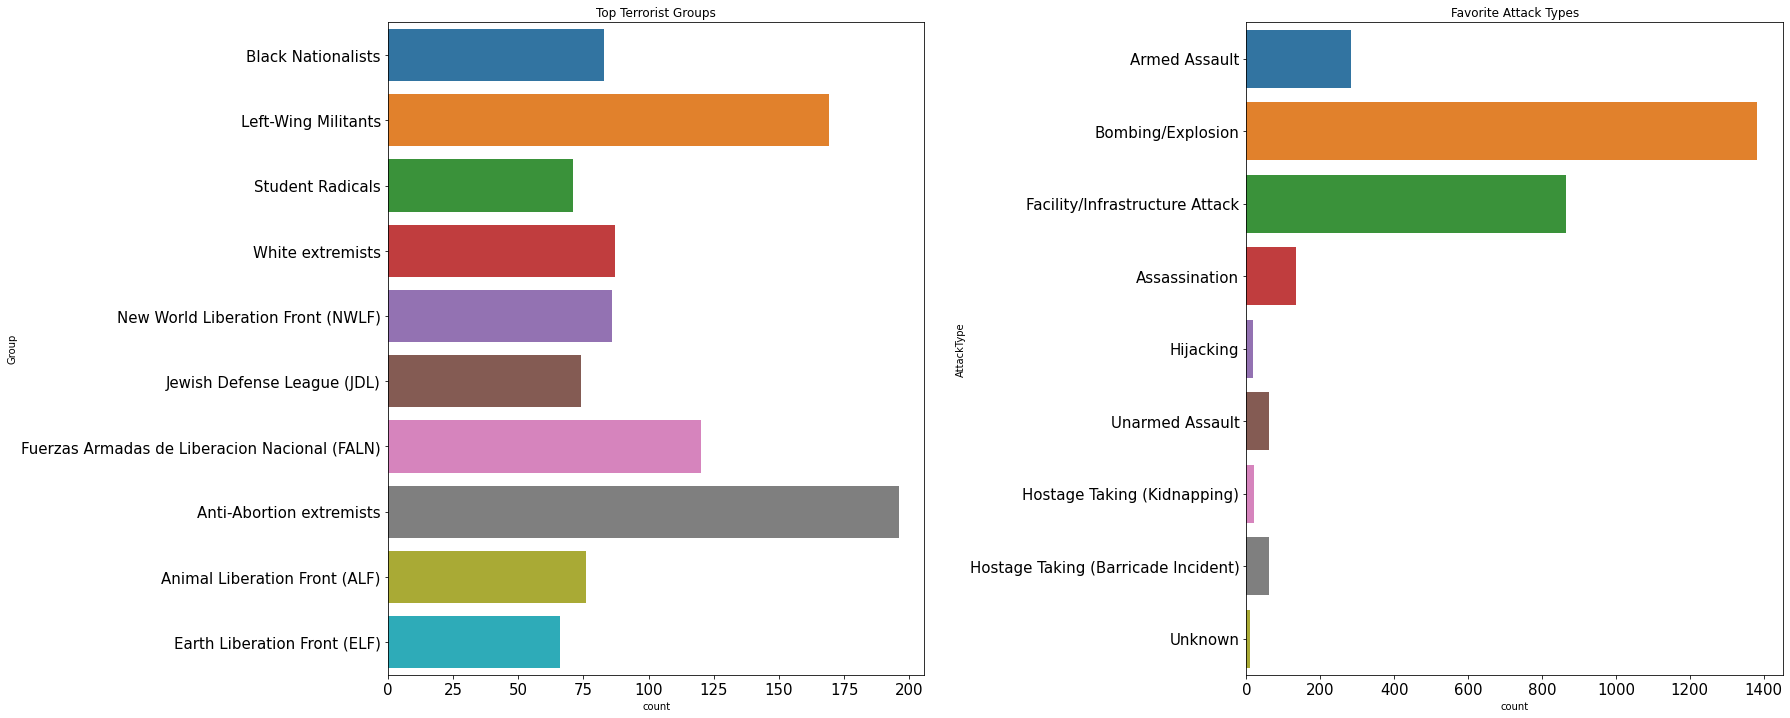

In [55]:
terror_usa = data[data['Country']=='United States']

f,ax=plt.subplots(1,2,figsize=(25,12))
usa_groups = terror_usa['Group'].value_counts()[1:11].index
usa_groups = terror_usa[terror_usa['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='AttackType',data=terror_usa,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

#### Most Notorious Groups in India and Favorite Attack Type

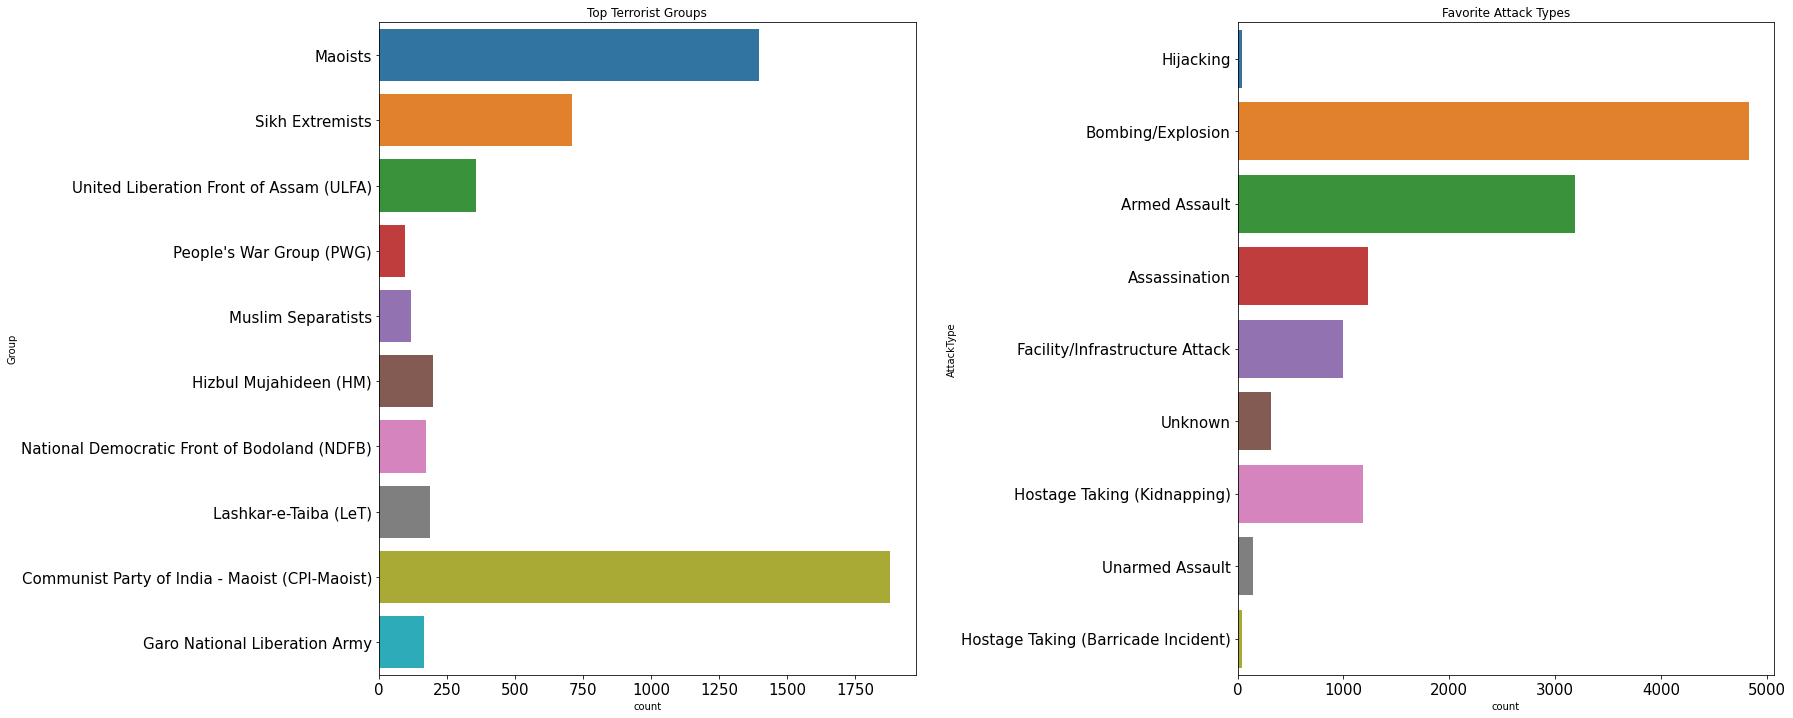

In [58]:
terror_india=data[data['Country']=='India']

f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

- The North-eastern and the Northern parts of India are the most terrorism prone areas. Jammu and Kashmir has witnessed highest attacks, and the numbers have gone up substantially since 1980's. The worst attack till date in India is the Mumbai Attack in 2006, which killed more than 200 people.

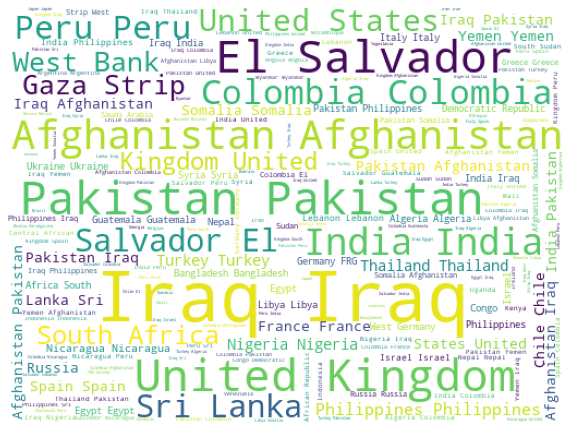

In [47]:
from wordcloud import WordCloud
from scipy import signal
cities = data.Country.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## *Thank You*